In [0]:
# necessary libraries 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [0]:
# dataset import
dataset = pd.read_csv('musk_csv.csv')

In [0]:
# dataset.head()

In [0]:
# changing pandas dataFrame to numpy array
x = dataset.iloc[:,3:169]
y = dataset['class'].values

In [0]:
temp = dataset.iloc[:,1]

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
temp_le = le.fit_transform(temp)
temp_le = temp_le.reshape(-1,1)
ohe = OneHotEncoder()
temp_ohe = ohe.fit_transform(temp_le).toarray()

In [0]:
x_new = np.hstack((x,temp_ohe))

In [153]:
x_new.shape

(6598, 268)

In [0]:
# normalizing the data
sc = StandardScaler()
x_new = sc.fit_transform(x_new)

In [0]:
ohe1 = OneHotEncoder()
y = ohe1.fit_transform(y.reshape(-1,1)).toarray()

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5278, 268) (1320, 268) (5278, 2) (1320, 2)


In [0]:
# Building Neural Network 
# Dense means fully connected layer
model = Sequential()
model.add(Dense(16,input_dim = 268,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2,activation='softmax')) 

In [0]:
# Categorical_crossentropy specifies that we have multiple classes
# adam optimizer is used here to update the weight ot neural network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [159]:
# training the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 1s 130us/step - loss: 0.2617 - acc: 0.9087 - val_loss: 0.1202 - val_acc: 0.9621
Epoch 2/10
5278/5278 [==============================] - 0s 28us/step - loss: 0.0649 - acc: 0.9833 - val_loss: 0.0372 - val_acc: 0.9917
Epoch 3/10
5278/5278 [==============================] - 0s 27us/step - loss: 0.0183 - acc: 0.9972 - val_loss: 0.0136 - val_acc: 0.9985
Epoch 4/10
5278/5278 [==============================] - 0s 29us/step - loss: 0.0068 - acc: 0.9996 - val_loss: 0.0067 - val_acc: 0.9992
Epoch 5/10
5278/5278 [==============================] - 0s 27us/step - loss: 0.0035 - acc: 0.9998 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 6/10
5278/5278 [==============================] - 0s 27us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 7/10
5278/5278 [==============================] - 0s 29us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 

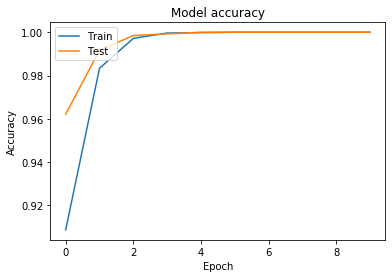

In [160]:
# for creating graph
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

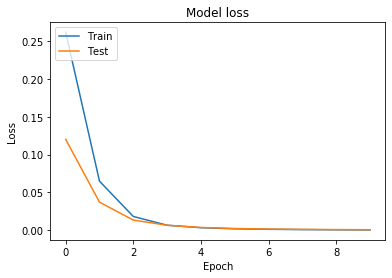

In [161]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [162]:
# for finding precision , recall F-measure
from sklearn.metrics  import precision_recall_fscore_support
y_true = y_test
y_pred = model.predict(x_test)
# post-processing of y_predicted
for i in range(y_pred.shape[0]):
  if(y_pred[i][0]>y_pred[i][1]):
    y_pred[i][0]=1
    y_pred[i][1]=0
  else:
    y_pred[i][0]=0
    y_pred[i][1]=1
precision_recall_fscore_support(y_true, y_pred, average='micro')

(1.0, 1.0, 1.0, None)